# Music Genre Classification

## 3. Audio Statistics

<img src='music.jpg' width = 600>

<div class="alert alert-info"> <b> In this notebook we will produce some statistics for all the audio files</b></div>

Serge Retkowsky | serge.retkowsky@microsoft.com | 02-Mar-2022 | V1

In [1]:
#!pip install pandas-profiling

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import librosa, librosa.display, IPython.display as ipd
import numpy as np
#import noisereduce as nr
import wave
from scipy.io import wavfile as wav
import os.path
from os import path
import os
import time
import seaborn
import glob
from datetime import datetime
import shutil
from pathlib import Path
import urllib.request
from zipfile import ZipFile
import pandas as pd
import audio_metadata
import xlwt
from pandas_profiling import ProfileReport

In [3]:
import sys
sys.version

'3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) \n[GCC 7.3.0]'

In [4]:
def createdir(dirname):
    if path.os.path.isdir(dirname):
        print("Directory:", dirname, "exists!")
    else:
        print("Creating directory:", dirname)
        os.mkdir(dirname)
        print("Done")

In [5]:
def fileinfos(LOCALFILE):
    timefile1 = os.path.getmtime(LOCALFILE)
    timefile = time.ctime(timefile1)
    timefile = time.strptime(timefile)
    timestamp = time.strftime("%Y-%m-%d %H:%M:%S", timefile)
    file_size = os.path.getsize(LOCALFILE)
    file_size_mb = str(round(file_size/1024**2, 2))
    print(LOCALFILE, '-', timestamp, '-', file_size_mb, 'Mb')

In [6]:
def AudioMetadata(audiofile):
    
    import os.path
    import time
    import audio_metadata
    
    lastmodifdate = time.ctime(os.path.getmtime(audiofile))
    creationdate = time.ctime(os.path.getctime(audiofile))
    audiofilemetadata = audio_metadata.load(audiofile)
    audioformat=audiofilemetadata['streaminfo']['audio_format']
    bitdepth=audiofilemetadata['streaminfo']['bit_depth']
    bitrate=audiofilemetadata['streaminfo']['bitrate']
    nbchannels=audiofilemetadata['streaminfo']['channels']
    duration=audiofilemetadata['streaminfo']['duration']
    samplerate=audiofilemetadata['streaminfo']['sample_rate']
    audiofilesize=audiofilemetadata['filesize']
    
    print("-" * 10, " Audio Statistics ", "-" * 10 , "\n")
    print("Audio File:\t", audiofile)
    print("Modified Date:\t", lastmodifdate)
    print("Creation Date:\t", creationdate)
    print("File Size:\t", audiofilesize)
    print("Audio Format:\t", audioformat)
    print("Bit Depth:\t", bitdepth)
    print("Bit Rate:\t", bitrate)
    print("Sampling Rate:\t", samplerate)
    print("Nb of Channels:\t", nbchannels)
    print("Duration:\t", duration)
    print()
    return { 'audiofile' : audiofile , 'lastmodifdate' : lastmodifdate,  'creationdate' : creationdate ,
             'audiofilesize' : audiofilesize , 'audioformat' : audioformat,  'bitdepth' : bitdepth ,
             'bitrate' : bitrate , 'samplerate' : samplerate,  'nbchannels' : nbchannels , 'duration' : duration }

## Music Files

In [12]:
dfaudio = pd.DataFrame(columns = ["AudioFilePath" , "SubDir", "AudioFile", "CategoryWav", 
                                  "ModifiedDate", "CreationDate", "FileSize", "AudioFormat", 
                                  "BitDepth" , "BitRate", "SamplingRate", "NbChannels", 
                                  "Duration"])

In [13]:
def dfaudiocreation(wavdir):
    nbfiles=1
    for roots, directories, files in os.walk(wavdir, topdown=False):
    
        for file in files:
            if file.endswith('.wav'):
     
                wavfilelocation = roots + '/' + file
                catwav = os.path.basename(os.path.normpath(roots))
                subd = Path(roots)
                subdir=subd.parts[1]
                result=AudioMetadata(wavfilelocation)

                dfaudio.at[nbfiles, 'AudioFilePath'] = wavfilelocation
                dfaudio.at[nbfiles, 'SubDir'] = subdir
                dfaudio.at[nbfiles, 'AudioFile'] = file
                dfaudio.at[nbfiles, 'CategoryWav'] = catwav
                dfaudio.at[nbfiles, 'ModifiedDate'] = result['lastmodifdate']
                dfaudio.at[nbfiles, 'CreationDate'] = result['creationdate']
                dfaudio.at[nbfiles, 'FileSize'] = result['audiofilesize']
                dfaudio.at[nbfiles, 'AudioFormat'] = result['audioformat']
                dfaudio.at[nbfiles, 'BitDepth'] = result['bitdepth']
                dfaudio.at[nbfiles, 'BitRate'] = result['bitrate']
                dfaudio.at[nbfiles, 'SamplingRate'] = result['samplerate']
                dfaudio.at[nbfiles, 'NbChannels'] = result['nbchannels']
                dfaudio.at[nbfiles, 'Duration'] = result['duration']
                nbfiles+=1

    dfaudio['FileSize'] = dfaudio['FileSize'].astype(int, errors = 'raise')
    dfaudio['BitDepth'] = dfaudio['BitDepth'].astype(int, errors = 'raise')
    dfaudio['BitRate'] = dfaudio['BitRate'].astype(float, errors = 'raise')
    dfaudio['SamplingRate'] = dfaudio['SamplingRate'].astype(float, errors = 'raise')
    dfaudio['NbChannels'] = dfaudio['NbChannels'].astype(int, errors = 'raise')
    dfaudio['Duration'] = dfaudio['Duration'].astype(float, errors = 'raise')
    
    print("\n", "-" * 10, " Number of files analyzed =", nbfiles - 1, "-" * 10)

In [15]:
dfaudiocreation('audiofiles/genres/blues')
dfaudioblues = dfaudio

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/blues/blues.00000.wav
Modified Date:	 Wed Mar  5 18:06:55 2014
Creation Date:	 Wed Mar  2 08:29:30 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/blues/blues.00001.wav
Modified Date:	 Wed Mar  5 18:06:55 2014
Creation Date:	 Wed Mar  2 08:29:31 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/blues/blues.00002.wav
Modified Date:	 Wed Mar  5 18:06:55 2014
Creation Date:	 Wed Mar  2 08:29:31 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/blues/blues.00026.wav
Modified Date:	 Wed Mar  5 18:06:58 2014
Creation Date:	 Wed Mar  2 08:29:36 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/blues/blues.00027.wav
Modified Date:	 Wed Mar  5 18:06:58 2014
Creation Date:	 Wed Mar  2 08:29:37 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/blues/blues.00028.wav
Modified Date:	 Wed Mar  5 18:06:58 2014
Creation Date:	 Wed Mar  2 08:29:37 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/blues/blues.00052.wav
Modified Date:	 Wed Mar  5 18:07:00 2014
Creation Date:	 Wed Mar  2 08:29:41 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/blues/blues.00053.wav
Modified Date:	 Wed Mar  5 18:07:00 2014
Creation Date:	 Wed Mar  2 08:29:42 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/blues/blues.00054.wav
Modified Date:	 Wed Mar  5 18:07:01 2014
Creation Date:	 Wed Mar  2 08:29:42 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/blues/blues.00078.wav
Modified Date:	 Wed Mar  5 18:07:02 2014
Creation Date:	 Wed Mar  2 08:29:46 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/blues/blues.00079.wav
Modified Date:	 Wed Mar  5 18:07:02 2014
Creation Date:	 Wed Mar  2 08:29:47 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/blues/blues.00080.wav
Modified Date:	 Wed Mar  5 18:07:02 2014
Creation Date:	 Wed Mar  2 08:29:47 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013

In [16]:
del dfaudio
dfaudio = pd.DataFrame(columns = ["AudioFilePath" , "SubDir", "AudioFile", "CategoryWav", "ModifiedDate", 
                                   "CreationDate", "FileSize", 
                                   "AudioFormat", "BitDepth" , "BitRate", "SamplingRate", 
                                   "NbChannels", "Duration"])
dfaudiocreation('audiofiles/genres/classical')
dfaudioclassical = dfaudio

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/classical/classical.00000.wav
Modified Date:	 Wed Mar  5 18:07:04 2014
Creation Date:	 Wed Mar  2 08:28:57 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/classical/classical.00001.wav
Modified Date:	 Wed Mar  5 18:07:04 2014
Creation Date:	 Wed Mar  2 08:28:57 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/classical/classical.00002.wav
Modified Date:	 Wed Mar  5 18:07:04 2014
Creation Date:	 Wed Mar  2 08:28:58 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channe

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/classical/classical.00026.wav
Modified Date:	 Wed Mar  5 18:07:06 2014
Creation Date:	 Wed Mar  2 08:29:06 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/classical/classical.00027.wav
Modified Date:	 Wed Mar  5 18:07:06 2014
Creation Date:	 Wed Mar  2 08:29:07 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/classical/classical.00028.wav
Modified Date:	 Wed Mar  5 18:07:06 2014
Creation Date:	 Wed Mar  2 08:29:07 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channe

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/classical/classical.00052.wav
Modified Date:	 Wed Mar  5 18:07:10 2014
Creation Date:	 Wed Mar  2 08:29:14 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/classical/classical.00053.wav
Modified Date:	 Wed Mar  5 18:07:10 2014
Creation Date:	 Wed Mar  2 08:29:14 2022
File Size:	 1340284
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.39092970521542

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/classical/classical.00054.wav
Modified Date:	 Wed Mar  5 18:07:10 2014
Creation Date:	 Wed Mar  2 08:29:14 2022
File Size:	 1344608
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channel

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/classical/classical.00076.wav
Modified Date:	 Wed Mar  5 18:07:15 2014
Creation Date:	 Wed Mar  2 08:29:23 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/classical/classical.00077.wav
Modified Date:	 Wed Mar  5 18:07:15 2014
Creation Date:	 Wed Mar  2 08:29:23 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/classical/classical.00078.wav
Modified Date:	 Wed Mar  5 18:07:15 2014
Creation Date:	 Wed Mar  2 08:29:23 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channe

In [17]:
del dfaudio
dfaudio = pd.DataFrame(columns = ["AudioFilePath" , "SubDir", "AudioFile", "CategoryWav", "ModifiedDate", 
                                   "CreationDate", "FileSize", 
                                   "AudioFormat", "BitDepth" , "BitRate", "SamplingRate", 
                                   "NbChannels", "Duration"])
dfaudiocreation('audiofiles/genres/country')
dfaudiocountry= dfaudio

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/country/country.00000.wav
Modified Date:	 Wed Mar  5 18:07:18 2014
Creation Date:	 Wed Mar  2 08:28:25 2022
File Size:	 1326644
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.081632653061224

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/country/country.00001.wav
Modified Date:	 Wed Mar  5 18:07:18 2014
Creation Date:	 Wed Mar  2 08:28:25 2022
File Size:	 1323564
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.011791383219954

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/country/country.00002.wav
Modified Date:	 Wed Mar  5 18:07:18 2014
Creation Date:	 Wed Mar  2 08:28:26 2022
File Size:	 1339404
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Durat

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/country/country.00024.wav
Modified Date:	 Wed Mar  5 18:07:20 2014
Creation Date:	 Wed Mar  2 08:28:33 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/country/country.00025.wav
Modified Date:	 Wed Mar  5 18:07:21 2014
Creation Date:	 Wed Mar  2 08:28:33 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/country/country.00026.wav
Modified Date:	 Wed Mar  5 18:07:21 2014
Creation Date:	 Wed Mar  2 08:28:33 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Durat

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/country/country.00049.wav
Modified Date:	 Wed Mar  5 18:07:22 2014
Creation Date:	 Wed Mar  2 08:28:39 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/country/country.00050.wav
Modified Date:	 Wed Mar  5 18:07:22 2014
Creation Date:	 Wed Mar  2 08:28:39 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/country/country.00051.wav
Modified Date:	 Wed Mar  5 18:07:22 2014
Creation Date:	 Wed Mar  2 08:28:39 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Durat

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/country/country.00073.wav
Modified Date:	 Wed Mar  5 18:07:24 2014
Creation Date:	 Wed Mar  2 08:28:47 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/country/country.00074.wav
Modified Date:	 Wed Mar  5 18:07:24 2014
Creation Date:	 Wed Mar  2 08:28:47 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/country/country.00075.wav
Modified Date:	 Wed Mar  5 18:07:25 2014
Creation Date:	 Wed Mar  2 08:28:47 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Durat

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/country/country.00097.wav
Modified Date:	 Wed Mar  5 18:07:27 2014
Creation Date:	 Wed Mar  2 08:28:55 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/country/country.00098.wav
Modified Date:	 Wed Mar  5 18:07:27 2014
Creation Date:	 Wed Mar  2 08:28:55 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/country/country.00099.wav
Modified Date:	 Wed Mar  5 18:07:27 2014
Creation Date:	 Wed Mar  2 08:28:56 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Durat

In [18]:
del dfaudio
dfaudio = pd.DataFrame(columns = ["AudioFilePath" , "SubDir", "AudioFile", "CategoryWav", "ModifiedDate", 
                                   "CreationDate", "FileSize", 
                                   "AudioFormat", "BitDepth" , "BitRate", "SamplingRate", 
                                   "NbChannels", "Duration"])
dfaudiocreation('audiofiles/genres/disco')
dfaudiodisco = dfaudio

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/disco/disco.00000.wav
Modified Date:	 Wed Mar  5 18:07:27 2014
Creation Date:	 Wed Mar  2 08:28:00 2022
File Size:	 1328404
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.12154195011338

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/disco/disco.00001.wav
Modified Date:	 Wed Mar  5 18:07:27 2014
Creation Date:	 Wed Mar  2 08:28:01 2022
File Size:	 1332364
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.211337868480726

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/disco/disco.00002.wav
Modified Date:	 Wed Mar  5 18:07:27 2014
Creation Date:	 Wed Mar  2 08:28:01 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.0133

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/disco/disco.00027.wav
Modified Date:	 Wed Mar  5 18:07:29 2014
Creation Date:	 Wed Mar  2 08:28:06 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/disco/disco.00028.wav
Modified Date:	 Wed Mar  5 18:07:29 2014
Creation Date:	 Wed Mar  2 08:28:06 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/disco/disco.00029.wav
Modified Date:	 Wed Mar  5 18:07:29 2014
Creation Date:	 Wed Mar  2 08:28:06 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/disco/disco.00052.wav
Modified Date:	 Wed Mar  5 18:07:32 2014
Creation Date:	 Wed Mar  2 08:28:11 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/disco/disco.00053.wav
Modified Date:	 Wed Mar  5 18:07:32 2014
Creation Date:	 Wed Mar  2 08:28:11 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/disco/disco.00054.wav
Modified Date:	 Wed Mar  5 18:07:32 2014
Creation Date:	 Wed Mar  2 08:28:11 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/disco/disco.00079.wav
Modified Date:	 Wed Mar  5 18:07:35 2014
Creation Date:	 Wed Mar  2 08:28:19 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/disco/disco.00080.wav
Modified Date:	 Wed Mar  5 18:07:35 2014
Creation Date:	 Wed Mar  2 08:28:20 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/disco/disco.00081.wav
Modified Date:	 Wed Mar  5 18:07:35 2014
Creation Date:	 Wed Mar  2 08:28:20 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018

In [19]:
del dfaudio
dfaudio = pd.DataFrame(columns = ["AudioFilePath" , "SubDir", "AudioFile", "CategoryWav", "ModifiedDate", 
                                   "CreationDate", "FileSize", 
                                   "AudioFormat", "BitDepth" , "BitRate", "SamplingRate", 
                                   "NbChannels", "Duration"])
dfaudiocreation('audiofiles/genres/hiphop')
dfaudiohiphop = dfaudio

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/hiphop/hiphop.00000.wav
Modified Date:	 Wed Mar  5 18:07:37 2014
Creation Date:	 Wed Mar  2 08:27:32 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/hiphop/hiphop.00001.wav
Modified Date:	 Wed Mar  5 18:07:37 2014
Creation Date:	 Wed Mar  2 08:27:32 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/hiphop/hiphop.00002.wav
Modified Date:	 Wed Mar  5 18:07:37 2014
Creation Date:	 Wed Mar  2 08:27:32 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/hiphop/hiphop.00025.wav
Modified Date:	 Wed Mar  5 18:07:39 2014
Creation Date:	 Wed Mar  2 08:27:43 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/hiphop/hiphop.00026.wav
Modified Date:	 Wed Mar  5 18:07:39 2014
Creation Date:	 Wed Mar  2 08:27:43 2022
File Size:	 1339404
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.370975056689343

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/hiphop/hiphop.00027.wav
Modified Date:	 Wed Mar  5 18:07:39 2014
Creation Date:	 Wed Mar  2 08:27:43 2022
File Size:	 1328844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/hiphop/hiphop.00052.wav
Modified Date:	 Wed Mar  5 18:07:42 2014
Creation Date:	 Wed Mar  2 08:27:50 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/hiphop/hiphop.00053.wav
Modified Date:	 Wed Mar  5 18:07:42 2014
Creation Date:	 Wed Mar  2 08:27:50 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/hiphop/hiphop.00054.wav
Modified Date:	 Wed Mar  5 18:07:42 2014
Creation Date:	 Wed Mar  2 08:27:50 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/hiphop/hiphop.00079.wav
Modified Date:	 Wed Mar  5 18:07:44 2014
Creation Date:	 Wed Mar  2 08:27:55 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/hiphop/hiphop.00080.wav
Modified Date:	 Wed Mar  5 18:07:44 2014
Creation Date:	 Wed Mar  2 08:27:56 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/hiphop/hiphop.00081.wav
Modified Date:	 Wed Mar  5 18:07:45 2014
Creation Date:	 Wed Mar  2 08:27:56 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30

In [20]:
del dfaudio
dfaudio = pd.DataFrame(columns = ["AudioFilePath" , "SubDir", "AudioFile", "CategoryWav", "ModifiedDate", 
                                   "CreationDate", "FileSize", 
                                   "AudioFormat", "BitDepth" , "BitRate", "SamplingRate", 
                                   "NbChannels", "Duration"])
dfaudiocreation('audiofiles/genres/jazz')
dfaudiojazz = dfaudio

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/jazz/jazz.00000.wav
Modified Date:	 Wed Mar  5 18:07:46 2014
Creation Date:	 Wed Mar  2 08:26:53 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/jazz/jazz.00001.wav
Modified Date:	 Wed Mar  5 18:07:46 2014
Creation Date:	 Wed Mar  2 08:26:54 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/jazz/jazz.00002.wav
Modified Date:	 Wed Mar  5 18:07:46 2014
Creation Date:	 Wed Mar  2 08:26:55 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/jazz/jazz.00027.wav
Modified Date:	 Wed Mar  5 18:07:48 2014
Creation Date:	 Wed Mar  2 08:27:06 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/jazz/jazz.00028.wav
Modified Date:	 Wed Mar  5 18:07:48 2014
Creation Date:	 Wed Mar  2 08:27:07 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/jazz/jazz.00029.wav
Modified Date:	 Wed Mar  5 18:07:48 2014
Creation Date:	 Wed Mar  2 08:27:07 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/jazz/jazz.00052.wav
Modified Date:	 Wed Mar  5 18:07:51 2014
Creation Date:	 Wed Mar  2 08:27:13 2022
File Size:	 1331924
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.201360544217685

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/jazz/jazz.00053.wav
Modified Date:	 Wed Mar  5 18:07:51 2014
Creation Date:	 Wed Mar  2 08:27:13 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/jazz/jazz.00054.wav
Modified Date:	 Wed Mar  5 18:07:51 2014
Creation Date:	 Wed Mar  2 08:27:13 2022
File Size:	 1324268
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.027755102

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/jazz/jazz.00078.wav
Modified Date:	 Wed Mar  5 18:07:53 2014
Creation Date:	 Wed Mar  2 08:27:22 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/jazz/jazz.00079.wav
Modified Date:	 Wed Mar  5 18:07:53 2014
Creation Date:	 Wed Mar  2 08:27:22 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/jazz/jazz.00080.wav
Modified Date:	 Wed Mar  5 18:07:53 2014
Creation Date:	 Wed Mar  2 08:27:23 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333

In [21]:
del dfaudio
dfaudio = pd.DataFrame(columns = ["AudioFilePath" , "SubDir", "AudioFile", "CategoryWav", "ModifiedDate", 
                                   "CreationDate", "FileSize", 
                                   "AudioFormat", "BitDepth" , "BitRate", "SamplingRate", 
                                   "NbChannels", "Duration"])
dfaudiocreation('audiofiles/genres/metal')
dfaudiometal = dfaudio

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/metal/metal.00000.wav
Modified Date:	 Wed Mar  5 18:07:57 2014
Creation Date:	 Wed Mar  2 08:26:17 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/metal/metal.00001.wav
Modified Date:	 Wed Mar  5 18:07:57 2014
Creation Date:	 Wed Mar  2 08:26:17 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/metal/metal.00002.wav
Modified Date:	 Wed Mar  5 18:07:57 2014
Creation Date:	 Wed Mar  2 08:26:18 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/metal/metal.00026.wav
Modified Date:	 Wed Mar  5 18:07:59 2014
Creation Date:	 Wed Mar  2 08:26:24 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/metal/metal.00027.wav
Modified Date:	 Wed Mar  5 18:07:59 2014
Creation Date:	 Wed Mar  2 08:26:25 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/metal/metal.00028.wav
Modified Date:	 Wed Mar  5 18:08:00 2014
Creation Date:	 Wed Mar  2 08:26:25 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/metal/metal.00053.wav
Modified Date:	 Wed Mar  5 18:08:01 2014
Creation Date:	 Wed Mar  2 08:26:33 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/metal/metal.00054.wav
Modified Date:	 Wed Mar  5 18:08:01 2014
Creation Date:	 Wed Mar  2 08:26:34 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/metal/metal.00055.wav
Modified Date:	 Wed Mar  5 18:08:01 2014
Creation Date:	 Wed Mar  2 08:26:34 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/metal/metal.00079.wav
Modified Date:	 Wed Mar  5 18:08:03 2014
Creation Date:	 Wed Mar  2 08:26:46 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/metal/metal.00080.wav
Modified Date:	 Wed Mar  5 18:08:03 2014
Creation Date:	 Wed Mar  2 08:26:47 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/metal/metal.00081.wav
Modified Date:	 Wed Mar  5 18:08:03 2014
Creation Date:	 Wed Mar  2 08:26:47 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018

In [22]:
del dfaudio
dfaudio = pd.DataFrame(columns = ["AudioFilePath" , "SubDir", "AudioFile", "CategoryWav", "ModifiedDate", 
                                   "CreationDate", "FileSize", 
                                   "AudioFormat", "BitDepth" , "BitRate", "SamplingRate", 
                                   "NbChannels", "Duration"])
dfaudiocreation('audiofiles/genres/pop')
dfaudiopop= dfaudio

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/pop/pop.00000.wav
Modified Date:	 Wed Mar  5 18:08:04 2014
Creation Date:	 Wed Mar  2 08:25:47 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/pop/pop.00001.wav
Modified Date:	 Wed Mar  5 18:08:04 2014
Creation Date:	 Wed Mar  2 08:25:47 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/pop/pop.00002.wav
Modified Date:	 Wed Mar  5 18:08:04 2014
Creation Date:	 Wed Mar  2 08:25:48 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

-

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/pop/pop.00025.wav
Modified Date:	 Wed Mar  5 18:08:06 2014
Creation Date:	 Wed Mar  2 08:25:52 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/pop/pop.00026.wav
Modified Date:	 Wed Mar  5 18:08:06 2014
Creation Date:	 Wed Mar  2 08:25:52 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/pop/pop.00027.wav
Modified Date:	 Wed Mar  5 18:08:06 2014
Creation Date:	 Wed Mar  2 08:25:53 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

-

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/pop/pop.00052.wav
Modified Date:	 Wed Mar  5 18:08:08 2014
Creation Date:	 Wed Mar  2 08:26:00 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/pop/pop.00053.wav
Modified Date:	 Wed Mar  5 18:08:08 2014
Creation Date:	 Wed Mar  2 08:26:00 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/pop/pop.00054.wav
Modified Date:	 Wed Mar  5 18:08:08 2014
Creation Date:	 Wed Mar  2 08:26:01 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

-

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/pop/pop.00079.wav
Modified Date:	 Wed Mar  5 18:08:10 2014
Creation Date:	 Wed Mar  2 08:26:11 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/pop/pop.00080.wav
Modified Date:	 Wed Mar  5 18:08:10 2014
Creation Date:	 Wed Mar  2 08:26:11 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/pop/pop.00081.wav
Modified Date:	 Wed Mar  5 18:08:10 2014
Creation Date:	 Wed Mar  2 08:26:11 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

-

In [23]:
del dfaudio
dfaudio = pd.DataFrame(columns = ["AudioFilePath" , "SubDir", "AudioFile", "CategoryWav", "ModifiedDate", 
                                   "CreationDate", "FileSize", 
                                   "AudioFormat", "BitDepth" , "BitRate", "SamplingRate", 
                                   "NbChannels", "Duration"])
dfaudiocreation('audiofiles/genres/reggae')
dfaudioreggae= dfaudio

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/reggae/reggae.00000.wav
Modified Date:	 Wed Mar  5 18:08:12 2014
Creation Date:	 Wed Mar  2 08:25:14 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/reggae/reggae.00001.wav
Modified Date:	 Wed Mar  5 18:08:12 2014
Creation Date:	 Wed Mar  2 08:25:14 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/reggae/reggae.00002.wav
Modified Date:	 Wed Mar  5 18:08:12 2014
Creation Date:	 Wed Mar  2 08:25:15 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/reggae/reggae.00025.wav
Modified Date:	 Wed Mar  5 18:08:13 2014
Creation Date:	 Wed Mar  2 08:25:22 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/reggae/reggae.00026.wav
Modified Date:	 Wed Mar  5 18:08:13 2014
Creation Date:	 Wed Mar  2 08:25:22 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/reggae/reggae.00027.wav
Modified Date:	 Wed Mar  5 18:08:13 2014
Creation Date:	 Wed Mar  2 08:25:22 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/reggae/reggae.00050.wav
Modified Date:	 Wed Mar  5 18:08:15 2014
Creation Date:	 Wed Mar  2 08:25:32 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/reggae/reggae.00051.wav
Modified Date:	 Wed Mar  5 18:08:15 2014
Creation Date:	 Wed Mar  2 08:25:32 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/reggae/reggae.00052.wav
Modified Date:	 Wed Mar  5 18:08:15 2014
Creation Date:	 Wed Mar  2 08:25:32 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/reggae/reggae.00075.wav
Modified Date:	 Wed Mar  5 18:08:16 2014
Creation Date:	 Wed Mar  2 08:25:39 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/reggae/reggae.00076.wav
Modified Date:	 Wed Mar  5 18:08:17 2014
Creation Date:	 Wed Mar  2 08:25:39 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.00018140589569

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/reggae/reggae.00077.wav
Modified Date:	 Wed Mar  5 18:08:17 2014
Creation Date:	 Wed Mar  2 08:25:40 2022
File Size:	 1323052
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30

In [24]:
del dfaudio
dfaudio = pd.DataFrame(columns = ["AudioFilePath" , "SubDir", "AudioFile", "CategoryWav", "ModifiedDate", 
                                   "CreationDate", "FileSize", 
                                   "AudioFormat", "BitDepth" , "BitRate", "SamplingRate", 
                                   "NbChannels", "Duration"])
dfaudiocreation('audiofiles/genres/rock')
dfaudiorock= dfaudio

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/rock/rock.00000.wav
Modified Date:	 Wed Mar  5 18:08:19 2014
Creation Date:	 Wed Mar  2 08:24:22 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/rock/rock.00001.wav
Modified Date:	 Wed Mar  5 18:08:19 2014
Creation Date:	 Wed Mar  2 08:24:23 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/rock/rock.00002.wav
Modified Date:	 Wed Mar  5 18:08:19 2014
Creation Date:	 Wed Mar  2 08:24:23 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/rock/rock.00025.wav
Modified Date:	 Wed Mar  5 18:08:20 2014
Creation Date:	 Wed Mar  2 08:24:32 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/rock/rock.00026.wav
Modified Date:	 Wed Mar  5 18:08:20 2014
Creation Date:	 Wed Mar  2 08:24:32 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/rock/rock.00027.wav
Modified Date:	 Wed Mar  5 18:08:20 2014
Creation Date:	 Wed Mar  2 08:24:33 2022
File Size:	 1323044
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.0

------

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/rock/rock.00052.wav
Modified Date:	 Wed Mar  5 18:08:22 2014
Creation Date:	 Wed Mar  2 08:24:43 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/rock/rock.00053.wav
Modified Date:	 Wed Mar  5 18:08:22 2014
Creation Date:	 Wed Mar  2 08:24:44 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/rock/rock.00054.wav
Modified Date:	 Wed Mar  5 18:08:22 2014
Creation Date:	 Wed Mar  2 08:24:45 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/rock/rock.00079.wav
Modified Date:	 Wed Mar  5 18:08:24 2014
Creation Date:	 Wed Mar  2 08:25:07 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/rock/rock.00080.wav
Modified Date:	 Wed Mar  5 18:08:24 2014
Creation Date:	 Wed Mar  2 08:25:07 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333333332

----------  Audio Statistics  ---------- 

Audio File:	 audiofiles/genres/rock/rock.00081.wav
Modified Date:	 Wed Mar  5 18:08:24 2014
Creation Date:	 Wed Mar  2 08:25:08 2022
File Size:	 1323632
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 352800
Sampling Rate:	 22050
Nb of Channels:	 1
Duration:	 30.013333333

## All files analysis

In [25]:
dfaudioall = pd.concat([dfaudioblues, dfaudioclassical, dfaudiocountry, dfaudiodisco, dfaudiohiphop, 
                        dfaudiojazz, dfaudiometal, dfaudiopop, dfaudioreggae, dfaudiorock])

In [26]:
dfaudioall.shape

(1000, 13)

In [27]:
dfaudioall.dtypes

AudioFilePath     object
SubDir            object
AudioFile         object
CategoryWav       object
ModifiedDate      object
CreationDate      object
FileSize           int64
AudioFormat       object
BitDepth           int64
BitRate          float64
SamplingRate     float64
NbChannels         int64
Duration         float64
dtype: object

In [28]:
dfaudioall.head(5)

,AudioFilePath,SubDir,AudioFile,CategoryWav,ModifiedDate,CreationDate,FileSize,AudioFormat,BitDepth,BitRate,SamplingRate,NbChannels,Duration
1,audiofiles/genres/blues/blues.00000.wav,genres,blues.00000.wav,blues,Wed Mar 5 18:06:55 2014,Wed Mar 2 08:29:30 2022,1323632,WAVEAudioFormat.PCM,16,352800.0,22050.0,1,30.013333
2,audiofiles/genres/blues/blues.00001.wav,genres,blues.00001.wav,blues,Wed Mar 5 18:06:55 2014,Wed Mar 2 08:29:31 2022,1323632,WAVEAudioFormat.PCM,16,352800.0,22050.0,1,30.013333
3,audiofiles/genres/blues/blues.00002.wav,genres,blues.00002.wav,blues,Wed Mar 5 18:06:55 2014,Wed Mar 2 08:29:31 2022,1323632,WAVEAudioFormat.PCM,16,352800.0,22050.0,1,30.013333
4,audiofiles/genres/blues/blues.00003.wav,genres,blues.00003.wav,blues,Wed Mar 5 18:06:55 2014,Wed Mar 2 08:29:31 2022,1323632,WAVEAudioFormat.PCM,16,352800.0,22050.0,1,30.013333
5,audiofiles/genres/blues/blues.00004.wav,genres,blues.00004.wav,blues,Wed Mar 5 18:06:55 2014,Wed Mar 2 08:29:31 2022,1323632,WAVEAudioFormat.PCM,16,352800.0,22050.0,1,30.013333


In [29]:
dfaudioall.tail(5)

,AudioFilePath,SubDir,AudioFile,CategoryWav,ModifiedDate,CreationDate,FileSize,AudioFormat,BitDepth,BitRate,SamplingRate,NbChannels,Duration
96,audiofiles/genres/rock/rock.00095.wav,genres,rock.00095.wav,rock,Wed Mar 5 18:08:26 2014,Wed Mar 2 08:25:12 2022,1323632,WAVEAudioFormat.PCM,16,352800.0,22050.0,1,30.013333
97,audiofiles/genres/rock/rock.00096.wav,genres,rock.00096.wav,rock,Wed Mar 5 18:08:26 2014,Wed Mar 2 08:25:13 2022,1323632,WAVEAudioFormat.PCM,16,352800.0,22050.0,1,30.013333
98,audiofiles/genres/rock/rock.00097.wav,genres,rock.00097.wav,rock,Wed Mar 5 18:08:26 2014,Wed Mar 2 08:25:13 2022,1323632,WAVEAudioFormat.PCM,16,352800.0,22050.0,1,30.013333
99,audiofiles/genres/rock/rock.00098.wav,genres,rock.00098.wav,rock,Wed Mar 5 18:08:26 2014,Wed Mar 2 08:25:14 2022,1323632,WAVEAudioFormat.PCM,16,352800.0,22050.0,1,30.013333
100,audiofiles/genres/rock/rock.00099.wav,genres,rock.00099.wav,rock,Wed Mar 5 18:08:26 2014,Wed Mar 2 08:25:14 2022,1323632,WAVEAudioFormat.PCM,16,352800.0,22050.0,1,30.013333


Text(0, 0.5, 'Freq')

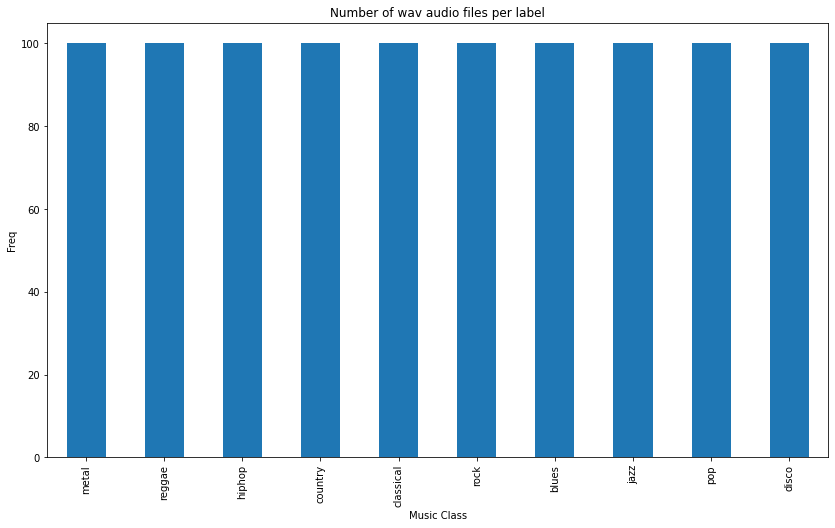

In [30]:
%matplotlib inline
dfaudioall['CategoryWav'].value_counts()

ax = dfaudioall['CategoryWav'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of wav audio files per label")
ax.set_xlabel("Music Class")
ax.set_ylabel("Freq")

## Exporting

In [31]:
createdir('reports')

Creating directory: reports
Done


In [32]:
dfaudioall.to_csv('reports/AudioStatistics.csv')

In [33]:
dfaudioall.to_excel('reports/AudioStatistics.xls')

In [34]:
fileinfos("reports/AudioStatistics.csv")
fileinfos("reports/AudioStatistics.xls")

reports/AudioStatistics.csv - 2022-03-02 08:48:08 - 0.18 Mb
reports/AudioStatistics.xls - 2022-03-02 08:48:09 - 0.25 Mb


In [35]:
from IPython.display import FileLink
AUDIOSTATSCSV_LINK = FileLink(path='reports/AudioStatistics.csv')
print("Click to download the file:")
AUDIOSTATSCSV_LINK

Click to download the file:


/mnt/batch/tasks/shared/LS_root/mounts/clusters/seretkow9/code/Users/seretkow/Sound/MusicGenreClassification/reports/AudioStatistics.csv

In [36]:
from IPython.display import FileLink
AUDIOSTATSXL_LINK = FileLink(path='reports/AudioStatistics.xls')
print("Click to download the file:")
AUDIOSTATSXL_LINK

Click to download the file:


/mnt/batch/tasks/shared/LS_root/mounts/clusters/seretkow9/code/Users/seretkow/Sound/MusicGenreClassification/reports/AudioStatistics.xls

> End of this notebook. You can use the next notebook.